# **Analysis of Chelsea FC Strikers Since 2017/18 Season**

## **Scenario**

Over the years Chelsea FC have had a notorious issue with thier strikers (particularly those that wear no.9). In the last decade or so the club has only had two strikers in Didier Drogba and Diego Costa who experienced a long spell of success at the club, earning the praise of Chelsea fans and rivals fans too. Meanwhile, strikers such as Fernando Torres, Radamel Falcao, Higuain, Morata, Werner, Lukaku and Havertz have been mocked publically for their failure to meet fans expectations. 

In this analysis, I aim to discover how each player since the departure of Diego Costa failed to meet expectations and understand the reasons as to why the player underperformed.

To do this, I will:
- Compare each strikers performance across each season while at Chelsea (shooting, chance creation, passing, defensive actions, possesion)
- Create visualisations to summarise the performance of each player
- Dive into each players performances prior to joing Chelsea and after departing Chelsea  (if applicable) combine this information with the performance of the Chelsea Team they played in and gage where the blame for the underperformance lies.
- Using this data, predict how a player might perform in the upcoming season absed on their history and the way their current team played last season.

## **Install Requirements**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as font_manager

In [3]:
font_dir = ['Fonts\Coming_Soon']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'Coming Soon'

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
import textwrap

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

## **Shooting**

### **Import Dataset**

In [6]:
shooting = pd.read_csv('Chelsea FC Striker Dataset - Shooting.csv')
shooting

,First Name,Last Name,Nation,Season,Age,Matches Played,Starts,Minutes Played,90s,Goals,Shots,Shots on Target,Shots on Target Percentage,Shots per 90,Shots on Target per 90,Goals per Shot,Goals per Shot on Target,Average Shot Distance,Penalty Kick Goals,Expected Goals,Non-Penalty Expected Goals,Non-Penalty Expected Goals per Shot,Goals - Expected Goals,Non-Penalty Goals - Expected Non-Penalty Goals
0,Alvaro,Morata,Spain,2017/18,24,31,24,"2,061",22.9,11,79,34,43.0%,3.45,1.48,0.14,0.32,13.6,0,13.0,13.0,0.16,-2.0,-2.0
1,Olivier,Giroud,France,2017/18,30,13,6,613,6.8,3,30,8,26.7%,4.40,1.17,0.10,0.38,11.5,0,3.6,3.6,0.12,-0.6,-0.6
2,Michy,Batshuayi,Belgium,2017/18,23,12,3,360,4.0,2,13,5,38.5%,3.25,1.25,0.15,0.40,18.0,0,1.1,1.1,0.28,0.9,-1.6
3,Gonzalo,Higuain,Argentina,2018/19,30,14,13,"1,085",12.1,5,46,14,30.4%,3.82,1.16,0.11,0.36,15.1,0,4.9,4.9,0.11,0.1,0.1
4,Alvaro,Morata,Spain,2018/19,25,16,11,941,10.5,5,35,16,45.7%,3.35,1.53,0.14,0.31,13.7,0,6.1,6.1,0.17,-1.1,-1.1
5,Olivier,Giroud,France,2018/19,31,27,7,847,9.4,2,32,10,31.3%,3.40,1.06,0.06,0.20,11.4,0,4.6,4.6,0.14,-2.6,-2.6
6,Tammy,Abraham,England,2019/20,21,34,25,"2,215",24.6,15,88,35,39.8%,3.58,1.42,0.17,0.43,11.6,0,16.4,16.4,0.19,-1.4,-1.4
7,Olivier,Giroud,France,2019/20,32,18,12,993,11.0,8,39,19,48.7%,3.53,1.72,0.21,0.42,11.5,0,7.3,7.3,0.19,0.7,0.7
8,Michy,Batshuayi,Belgium,2019/20,25,16,1,239,2.7,1,15,2,13.3%,5.65,0.75,0.07,0.50,13.8,0,2.4,2.4,0.16,-1.4,-1.4
9,Tammy,Abraham,England,2020/21,22,22,12,"1,040",11.6,6,32,13,40.6%,2.77,1.13,0.19,0.46,10.7,0,5.9,5.9,0.18,0.1,0.1


### **Exploratory Data Analysis**

In [7]:
print('Shooting Statistics\n')
print(f"Number of examples: {shooting.shape[0]}")
print(f"Number of features: {shooting.shape[1]}")
print(f"List of features:\n\t{shooting.columns}")
print(f"\nExamining all entries in the dataset:")
display(shooting)

Shooting Statistics

Number of examples: 20
Number of features: 24
List of features:
	Index(['First Name', 'Last Name', 'Nation', 'Season', 'Age', 'Matches Played', 'Starts', 'Minutes Played', '90s', 'Goals', 'Shots', 'Shots on Target', 'Shots on Target Percentage', 'Shots per 90', 'Shots on Target per 90', 'Goals per Shot', 'Goals per Shot on Target', 'Average Shot Distance', 'Penalty Kick Goals', 'Expected Goals', 'Non-Penalty Expected Goals', 'Non-Penalty Expected Goals per Shot', 'Goals - Expected Goals', 'Non-Penalty Goals - Expected Non-Penalty Goals'], dtype='object')

Examining all entries in the dataset:


,First Name,Last Name,Nation,Season,Age,Matches Played,Starts,Minutes Played,90s,Goals,Shots,Shots on Target,Shots on Target Percentage,Shots per 90,Shots on Target per 90,Goals per Shot,Goals per Shot on Target,Average Shot Distance,Penalty Kick Goals,Expected Goals,Non-Penalty Expected Goals,Non-Penalty Expected Goals per Shot,Goals - Expected Goals,Non-Penalty Goals - Expected Non-Penalty Goals
0,Alvaro,Morata,Spain,2017/18,24,31,24,"2,061",22.9,11,79,34,43.0%,3.45,1.48,0.14,0.32,13.6,0,13.0,13.0,0.16,-2.0,-2.0
1,Olivier,Giroud,France,2017/18,30,13,6,613,6.8,3,30,8,26.7%,4.40,1.17,0.10,0.38,11.5,0,3.6,3.6,0.12,-0.6,-0.6
2,Michy,Batshuayi,Belgium,2017/18,23,12,3,360,4.0,2,13,5,38.5%,3.25,1.25,0.15,0.40,18.0,0,1.1,1.1,0.28,0.9,-1.6
3,Gonzalo,Higuain,Argentina,2018/19,30,14,13,"1,085",12.1,5,46,14,30.4%,3.82,1.16,0.11,0.36,15.1,0,4.9,4.9,0.11,0.1,0.1
4,Alvaro,Morata,Spain,2018/19,25,16,11,941,10.5,5,35,16,45.7%,3.35,1.53,0.14,0.31,13.7,0,6.1,6.1,0.17,-1.1,-1.1
5,Olivier,Giroud,France,2018/19,31,27,7,847,9.4,2,32,10,31.3%,3.40,1.06,0.06,0.20,11.4,0,4.6,4.6,0.14,-2.6,-2.6
6,Tammy,Abraham,England,2019/20,21,34,25,"2,215",24.6,15,88,35,39.8%,3.58,1.42,0.17,0.43,11.6,0,16.4,16.4,0.19,-1.4,-1.4
7,Olivier,Giroud,France,2019/20,32,18,12,993,11.0,8,39,19,48.7%,3.53,1.72,0.21,0.42,11.5,0,7.3,7.3,0.19,0.7,0.7
8,Michy,Batshuayi,Belgium,2019/20,25,16,1,239,2.7,1,15,2,13.3%,5.65,0.75,0.07,0.50,13.8,0,2.4,2.4,0.16,-1.4,-1.4
9,Tammy,Abraham,England,2020/21,22,22,12,"1,040",11.6,6,32,13,40.6%,2.77,1.13,0.19,0.46,10.7,0,5.9,5.9,0.18,0.1,0.1


In [8]:
print('Shooting statistics')
display(shooting.describe())

Shooting statistics


,Age,Matches Played,Starts,90s,Goals,Shots,Shots on Target,Shots per 90,Shots on Target per 90,Goals per Shot,Goals per Shot on Target,Average Shot Distance,Penalty Kick Goals,Expected Goals,Non-Penalty Expected Goals,Non-Penalty Expected Goals per Shot,Goals - Expected Goals,Non-Penalty Goals - Expected Non-Penalty Goals
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,25.700000,21.800000,13.500000,13.515000,5.250000,41.550000,16.250000,3.249500,1.211500,0.12600,0.330500,13.245000,0.100000,6.335000,6.285000,0.154000,-1.085000,-1.260000
std,4.329823,8.017087,8.804903,8.045612,3.567027,23.015956,9.904146,0.896346,0.254067,0.04512,0.115689,2.012193,0.307794,4.084409,4.073699,0.039921,1.668051,1.669037
min,20.000000,12.000000,1.000000,2.700000,1.000000,6.000000,2.000000,1.840000,0.750000,0.06000,0.140000,10.700000,0.000000,0.800000,0.800000,0.090000,-5.400000,-5.400000
25%,22.000000,15.750000,6.750000,7.925000,2.750000,29.750000,9.500000,2.697500,1.085000,0.09000,0.245000,11.575000,0.000000,4.050000,4.050000,0.137500,-1.625000,-1.700000
50%,24.500000,19.500000,12.000000,11.300000,4.500000,37.000000,15.000000,3.300000,1.150000,0.13000,0.335000,13.200000,0.000000,5.700000,5.650000,0.150000,-0.800000,-1.000000
75%,30.000000,27.500000,19.000000,18.300000,7.250000,48.500000,20.000000,3.542500,1.435000,0.15500,0.405000,13.800000,0.000000,7.650000,7.650000,0.170000,0.100000,-0.125000
max,33.000000,35.000000,30.000000,28.900000,15.000000,88.000000,35.000000,5.650000,1.720000,0.21000,0.570000,18.000000,1.000000,16.400000,16.400000,0.280000,1.400000,1.200000


In [9]:
# Create ID
shooting['ID'] = shooting['First Name'] + ' ' + shooting['Last Name'] + ' ' + shooting['Season']

# shift column to first position
first_column = shooting.pop('ID')
shooting.insert(0, 'ID', first_column)

# Display dataframe with new column
shooting

,ID,First Name,Last Name,Nation,Season,Age,Matches Played,Starts,Minutes Played,90s,Goals,Shots,Shots on Target,Shots on Target Percentage,Shots per 90,Shots on Target per 90,Goals per Shot,Goals per Shot on Target,Average Shot Distance,Penalty Kick Goals,Expected Goals,Non-Penalty Expected Goals,Non-Penalty Expected Goals per Shot,Goals - Expected Goals,Non-Penalty Goals - Expected Non-Penalty Goals
0,Alvaro Morata 2017/18,Alvaro,Morata,Spain,2017/18,24,31,24,"2,061",22.9,11,79,34,43.0%,3.45,1.48,0.14,0.32,13.6,0,13.0,13.0,0.16,-2.0,-2.0
1,Olivier Giroud 2017/18,Olivier,Giroud,France,2017/18,30,13,6,613,6.8,3,30,8,26.7%,4.40,1.17,0.10,0.38,11.5,0,3.6,3.6,0.12,-0.6,-0.6
2,Michy Batshuayi 2017/18,Michy,Batshuayi,Belgium,2017/18,23,12,3,360,4.0,2,13,5,38.5%,3.25,1.25,0.15,0.40,18.0,0,1.1,1.1,0.28,0.9,-1.6
3,Gonzalo Higuain 2018/19,Gonzalo,Higuain,Argentina,2018/19,30,14,13,"1,085",12.1,5,46,14,30.4%,3.82,1.16,0.11,0.36,15.1,0,4.9,4.9,0.11,0.1,0.1
4,Alvaro Morata 2018/19,Alvaro,Morata,Spain,2018/19,25,16,11,941,10.5,5,35,16,45.7%,3.35,1.53,0.14,0.31,13.7,0,6.1,6.1,0.17,-1.1,-1.1
5,Olivier Giroud 2018/19,Olivier,Giroud,France,2018/19,31,27,7,847,9.4,2,32,10,31.3%,3.40,1.06,0.06,0.20,11.4,0,4.6,4.6,0.14,-2.6,-2.6
6,Tammy Abraham 2019/20,Tammy,Abraham,England,2019/20,21,34,25,"2,215",24.6,15,88,35,39.8%,3.58,1.42,0.17,0.43,11.6,0,16.4,16.4,0.19,-1.4,-1.4
7,Olivier Giroud 2019/20,Olivier,Giroud,France,2019/20,32,18,12,993,11.0,8,39,19,48.7%,3.53,1.72,0.21,0.42,11.5,0,7.3,7.3,0.19,0.7,0.7
8,Michy Batshuayi 2019/20,Michy,Batshuayi,Belgium,2019/20,25,16,1,239,2.7,1,15,2,13.3%,5.65,0.75,0.07,0.50,13.8,0,2.4,2.4,0.16,-1.4,-1.4
9,Tammy Abraham 2020/21,Tammy,Abraham,England,2020/21,22,22,12,"1,040",11.6,6,32,13,40.6%,2.77,1.13,0.19,0.46,10.7,0,5.9,5.9,0.18,0.1,0.1


In [10]:
print("List of Players:", shooting['Last Name'].unique())
print("List of Players:", shooting['Last Name'])
print("Number of Players:", len(shooting['Last Name'].unique()))

ColourPaletteUnique = ["#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#d2f53c", "#fabebe" ,"#008080"]
ColourPalette = [ColourPaletteUnique[0], ColourPaletteUnique[1], ColourPaletteUnique[2], ColourPaletteUnique[3], ColourPaletteUnique[0], ColourPaletteUnique[1], ColourPaletteUnique[4], ColourPaletteUnique[1], ColourPaletteUnique[2], ColourPaletteUnique[4], ColourPaletteUnique[1], ColourPaletteUnique[5], ColourPaletteUnique[6], ColourPaletteUnique[7], ColourPaletteUnique[6], ColourPaletteUnique[5], ColourPaletteUnique[8], ColourPaletteUnique[9], ColourPaletteUnique[6], ColourPaletteUnique[10]]

List of Players: ['Morata' 'Giroud' 'Batshuayi' 'Higuain' 'Abraham' 'Werner' 'Havertz'
 'Lukaku' 'Aubameyang' 'Broja' 'Felix']
List of Players: 0         Morata
1         Giroud
2      Batshuayi
3        Higuain
4         Morata
5         Giroud
6        Abraham
7         Giroud
8      Batshuayi
9        Abraham
10        Giroud
11        Werner
12       Havertz
13        Lukaku
14       Havertz
15        Werner
16    Aubameyang
17         Broja
18       Havertz
19         Felix
Name: Last Name, dtype: object
Number of Players: 11


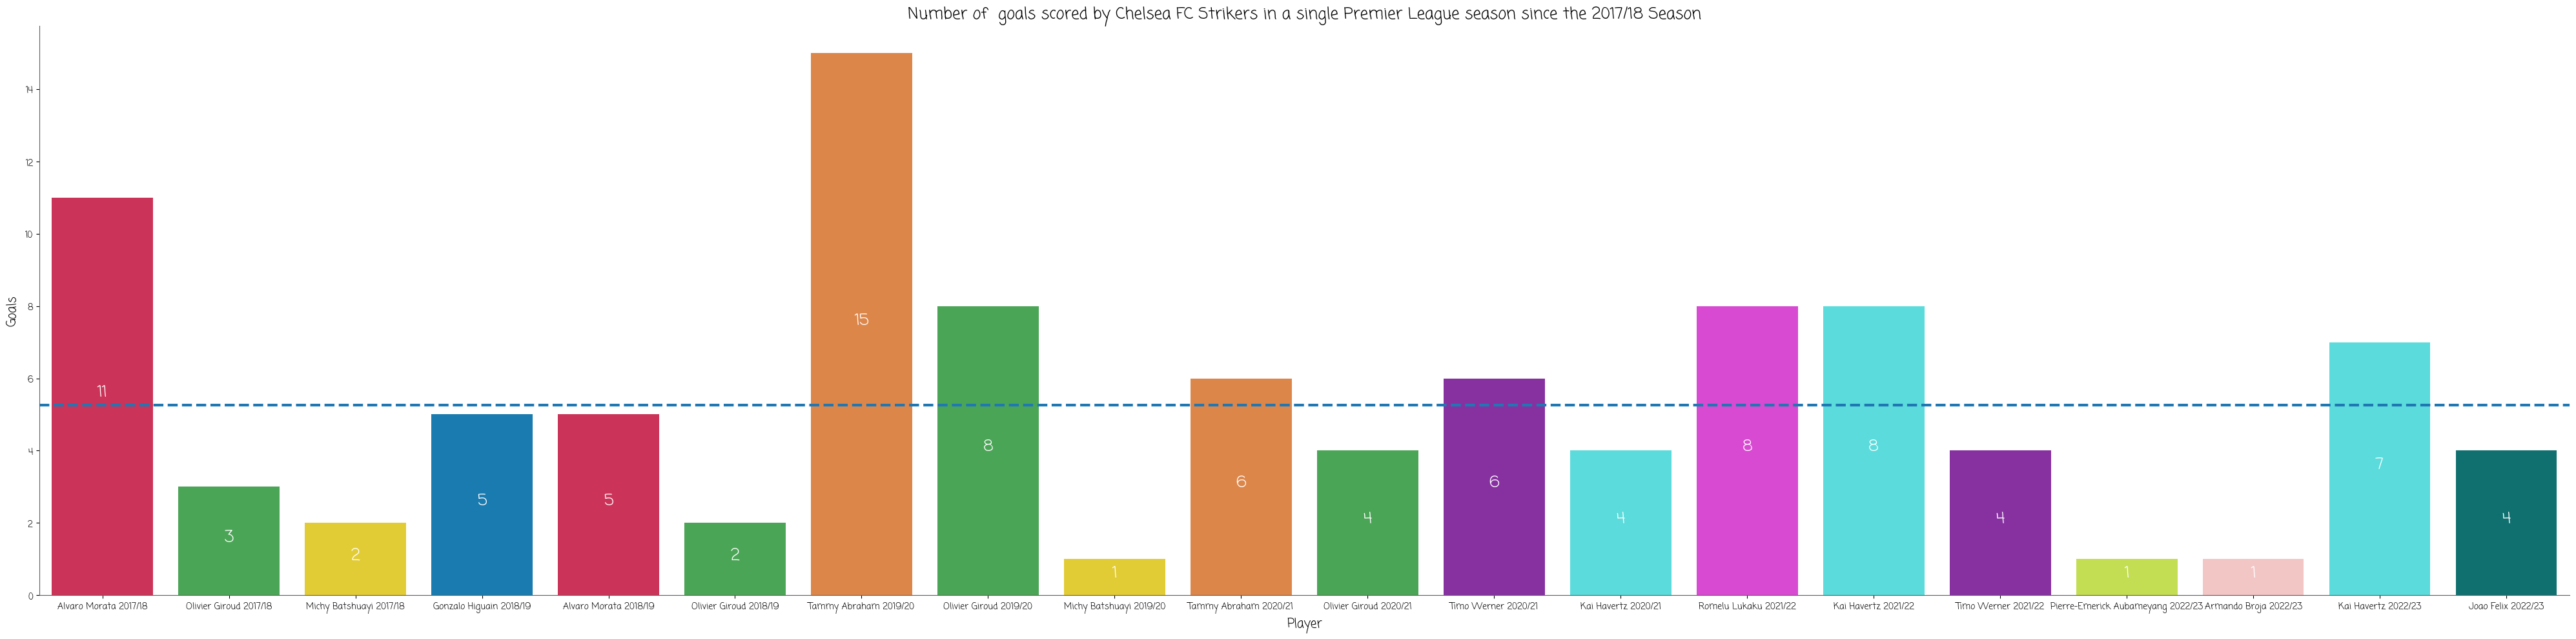

In [11]:
fig, ax = plt.subplots(figsize=(40, 10), tight_layout = True)

sns.barplot(x = "ID", y="Goals", data = shooting, palette = ColourPalette)

plt.title("Number of  goals scored by Chelsea FC Strikers in a single Premier League season since the 2017/18 Season", size=18)
plt.xlabel("Player",size=14)
plt.ylabel("Goals", size=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines[['bottom', 'left']].set_color('#5e5e5e')
ax.grid(False)

for i in range(0, shooting.shape[0]):
    plt.text(x=i, y=shooting['Goals'][i]/2, s=shooting['Goals'][i], color='white', fontsize=18, horizontalalignment='center')


plt.axhline(y=np.nanmean(shooting['Goals']), linestyle='--', linewidth=3, label='Avg')

plt.show()

In [12]:
# Create ID
shooting['Goals per 90'] = round(shooting['Goals'] / shooting['90s'], 2)

# shift column to first position
move_column = shooting.pop('Goals per 90')
shooting.insert(13, 'Goals per 90', move_column)

# Display dataframe with new column
shooting

,ID,First Name,Last Name,Nation,Season,Age,Matches Played,Starts,Minutes Played,90s,Goals,Shots,Shots on Target,Goals per 90,Shots on Target Percentage,Shots per 90,Shots on Target per 90,Goals per Shot,Goals per Shot on Target,Average Shot Distance,Penalty Kick Goals,Expected Goals,Non-Penalty Expected Goals,Non-Penalty Expected Goals per Shot,Goals - Expected Goals,Non-Penalty Goals - Expected Non-Penalty Goals
0,Alvaro Morata 2017/18,Alvaro,Morata,Spain,2017/18,24,31,24,"2,061",22.9,11,79,34,0.48,43.0%,3.45,1.48,0.14,0.32,13.6,0,13.0,13.0,0.16,-2.0,-2.0
1,Olivier Giroud 2017/18,Olivier,Giroud,France,2017/18,30,13,6,613,6.8,3,30,8,0.44,26.7%,4.40,1.17,0.10,0.38,11.5,0,3.6,3.6,0.12,-0.6,-0.6
2,Michy Batshuayi 2017/18,Michy,Batshuayi,Belgium,2017/18,23,12,3,360,4.0,2,13,5,0.50,38.5%,3.25,1.25,0.15,0.40,18.0,0,1.1,1.1,0.28,0.9,-1.6
3,Gonzalo Higuain 2018/19,Gonzalo,Higuain,Argentina,2018/19,30,14,13,"1,085",12.1,5,46,14,0.41,30.4%,3.82,1.16,0.11,0.36,15.1,0,4.9,4.9,0.11,0.1,0.1
4,Alvaro Morata 2018/19,Alvaro,Morata,Spain,2018/19,25,16,11,941,10.5,5,35,16,0.48,45.7%,3.35,1.53,0.14,0.31,13.7,0,6.1,6.1,0.17,-1.1,-1.1
5,Olivier Giroud 2018/19,Olivier,Giroud,France,2018/19,31,27,7,847,9.4,2,32,10,0.21,31.3%,3.40,1.06,0.06,0.20,11.4,0,4.6,4.6,0.14,-2.6,-2.6
6,Tammy Abraham 2019/20,Tammy,Abraham,England,2019/20,21,34,25,"2,215",24.6,15,88,35,0.61,39.8%,3.58,1.42,0.17,0.43,11.6,0,16.4,16.4,0.19,-1.4,-1.4
7,Olivier Giroud 2019/20,Olivier,Giroud,France,2019/20,32,18,12,993,11.0,8,39,19,0.73,48.7%,3.53,1.72,0.21,0.42,11.5,0,7.3,7.3,0.19,0.7,0.7
8,Michy Batshuayi 2019/20,Michy,Batshuayi,Belgium,2019/20,25,16,1,239,2.7,1,15,2,0.37,13.3%,5.65,0.75,0.07,0.50,13.8,0,2.4,2.4,0.16,-1.4,-1.4
9,Tammy Abraham 2020/21,Tammy,Abraham,England,2020/21,22,22,12,"1,040",11.6,6,32,13,0.52,40.6%,2.77,1.13,0.19,0.46,10.7,0,5.9,5.9,0.18,0.1,0.1


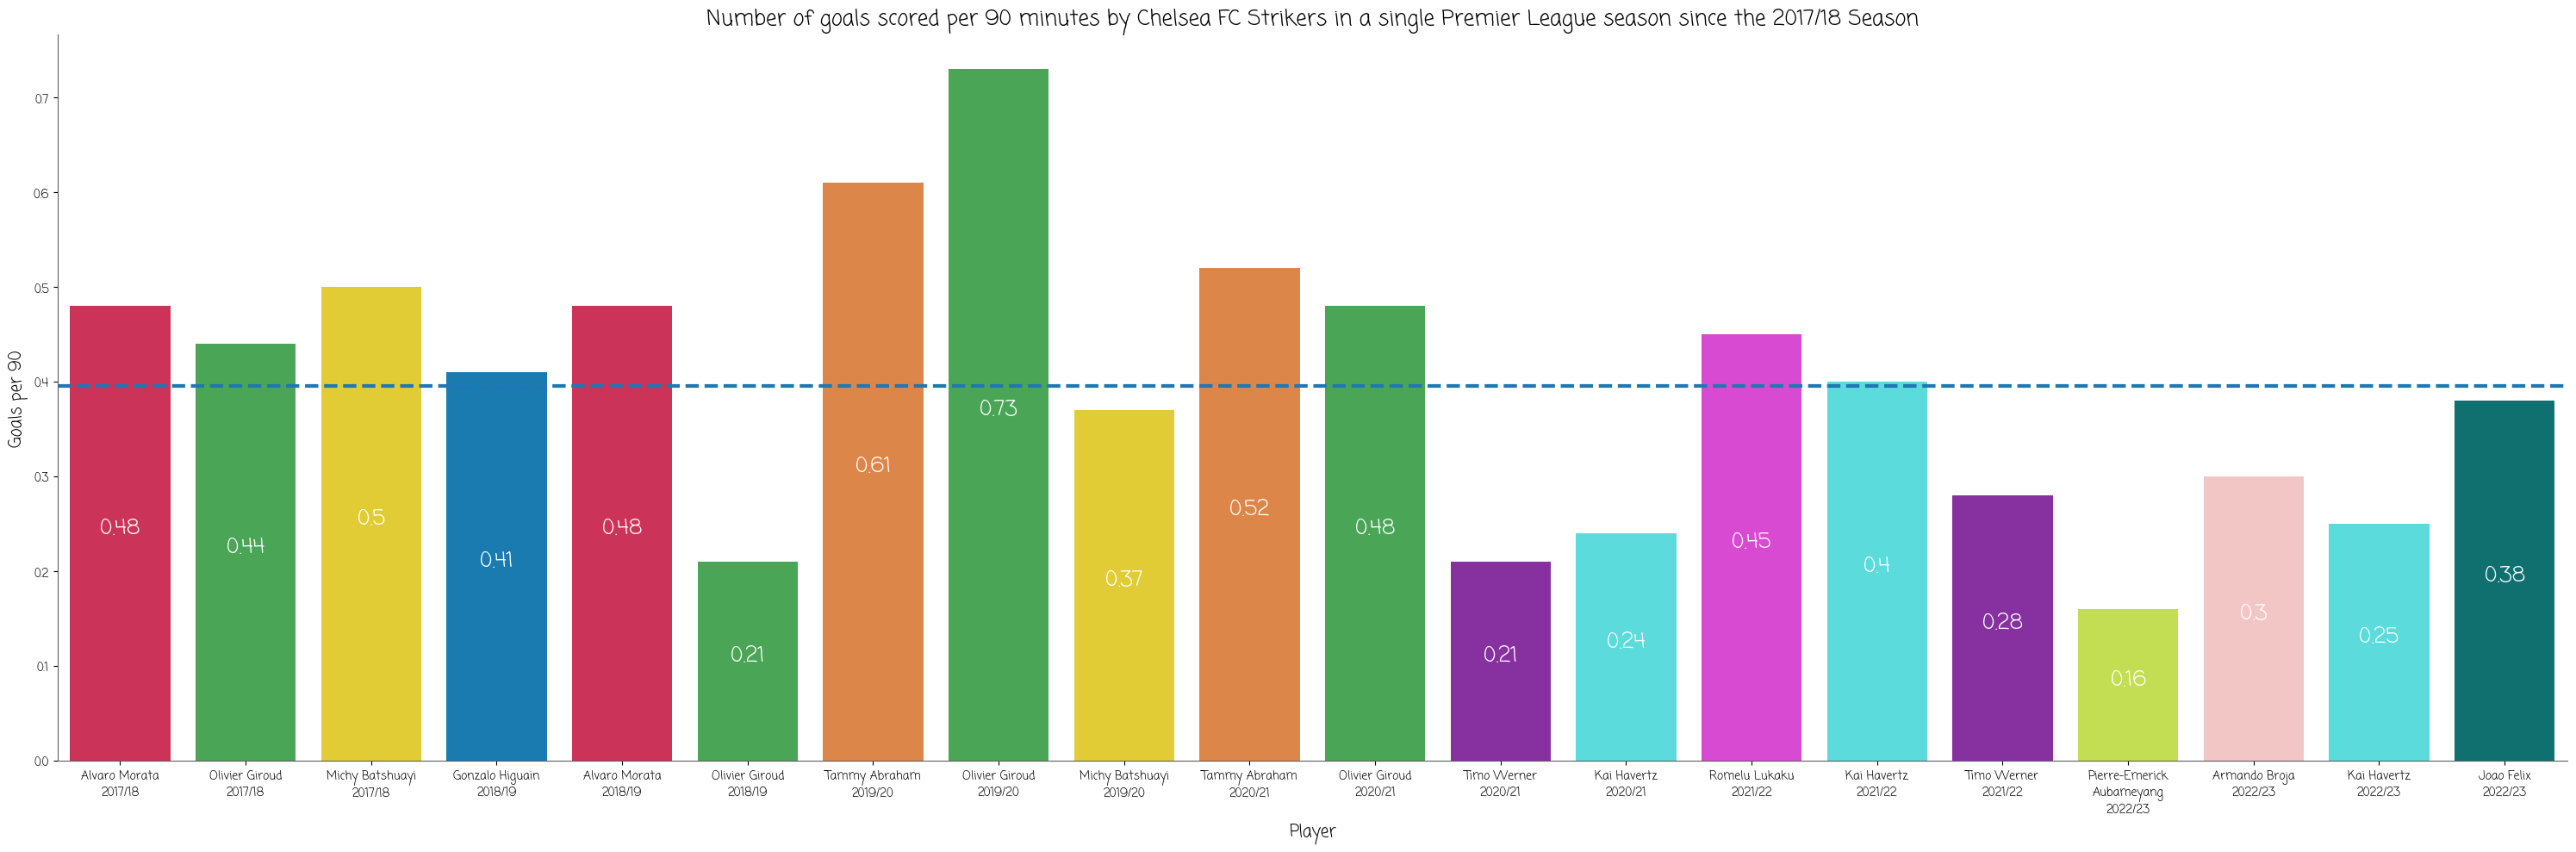

In [13]:
fig, ax = plt.subplots(figsize=(30, 10), tight_layout = True)

sns.barplot(x = "ID", y="Goals per 90", data = shooting, palette = ColourPalette)

plt.title("Number of goals scored per 90 minutes by Chelsea FC Strikers in a single Premier League season since the 2017/18 Season", size=18)
plt.xlabel("Player", size=14)
plt.ylabel("Goals per 90", size=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines[['bottom', 'left']].set_color('#5e5e5e')
ax.grid(False)

for i in range(0, shooting.shape[0]):
    plt.text(x=i, y=shooting['Goals per 90'][i]/2, s=shooting['Goals per 90'][i], color='white', fontsize=18, horizontalalignment='center')


plt.axhline(y=np.nanmean(shooting['Goals per 90']), linestyle='--', linewidth=3, label='Avg')

wrap_labels(ax,15)

plt.show()

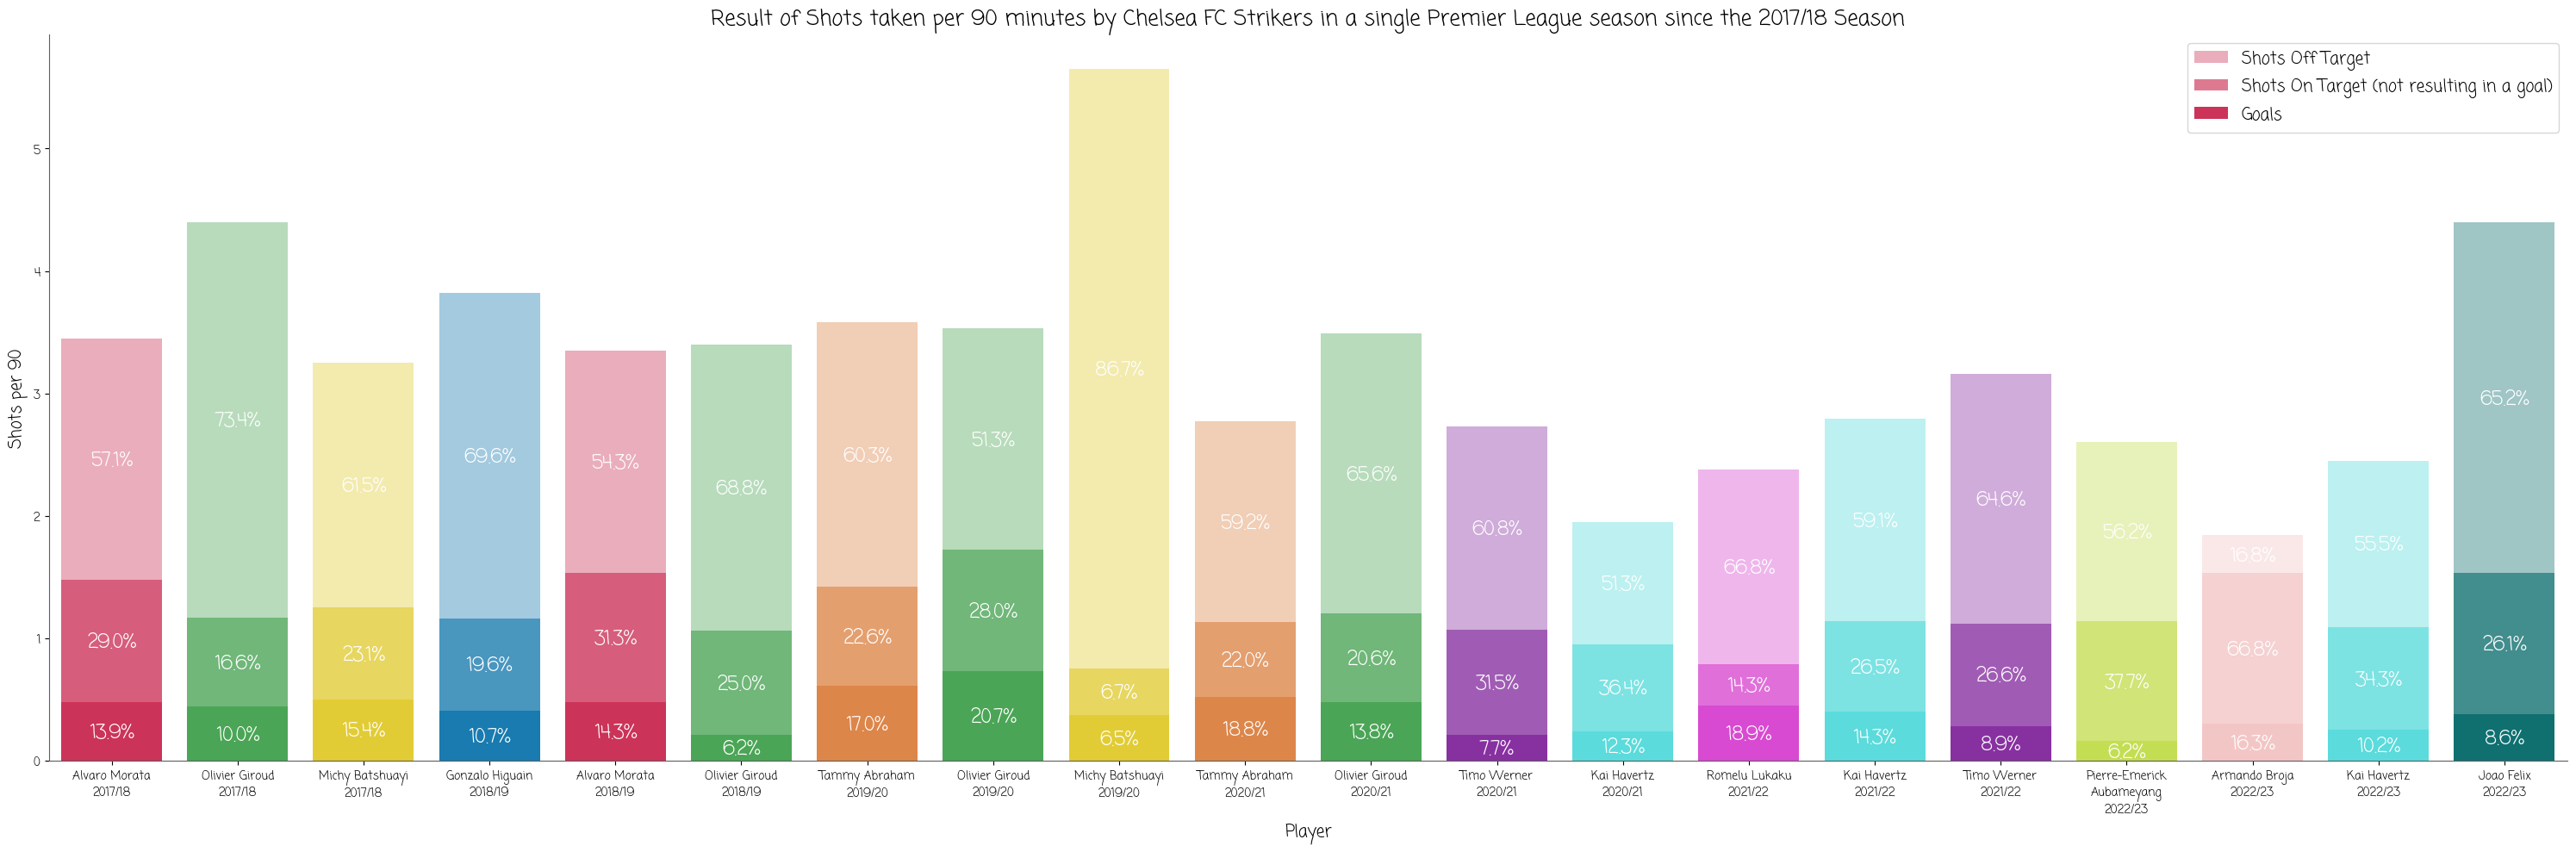

In [14]:
fig, ax = plt.subplots(figsize=(30, 10), tight_layout = True)

ax = sns.barplot(x = "ID", y="Shots per 90", data = shooting, palette = ColourPalette, alpha = 0.4, label = "Shots Off Target")
ax = sns.barplot(x = "ID", y="Shots on Target per 90", data = shooting, palette = ColourPalette, alpha = 0.65, label = "Shots On Target (not resulting in a goal)")
ax = sns.barplot(x = "ID", y="Goals per 90", data = shooting, palette = ColourPalette, label = "Goals")



plt.title("Result of Shots taken per 90 minutes by Chelsea FC Strikers in a single Premier League season since the 2017/18 Season", size=18)
plt.xlabel("Player", size=14)
plt.ylabel("Shots per 90", size=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines[['bottom', 'left']].set_color('#5e5e5e')
ax.grid(False)


for i in range(0, shooting.shape[0]):
    plt.text(x=i, y=(((shooting['Shots per 90'][i] + shooting['Shots on Target per 90'][i])/2) - 0.05), s=str(np.round(((shooting['Shots per 90'][i] - shooting['Shots on Target per 90'][i]) / shooting['Shots per 90'][i]) * 100, 1)) + "%", color='white', fontsize=16, horizontalalignment='center')
    plt.text(x=i, y=(((shooting['Shots on Target per 90'][i] + shooting['Goals per 90'][i])/2) - 0.05), s=str(np.round(((shooting['Shots on Target per 90'][i] - shooting['Goals per 90'][i]) / shooting['Shots per 90'][i]) * 100, 1)) + "%", color='white', fontsize=16, horizontalalignment='center')
    plt.text(x=i, y=((shooting['Goals per 90'][i]/2) - 0.05), s=str(np.round(shooting['Goals per 90'][i]/shooting['Shots per 90'][i] * 100, 1)) + "%", color='white', fontsize=16, weight='bold', horizontalalignment='center')

plt.legend(loc="upper right", fontsize=14)

wrap_labels(ax,15)

plt.show()

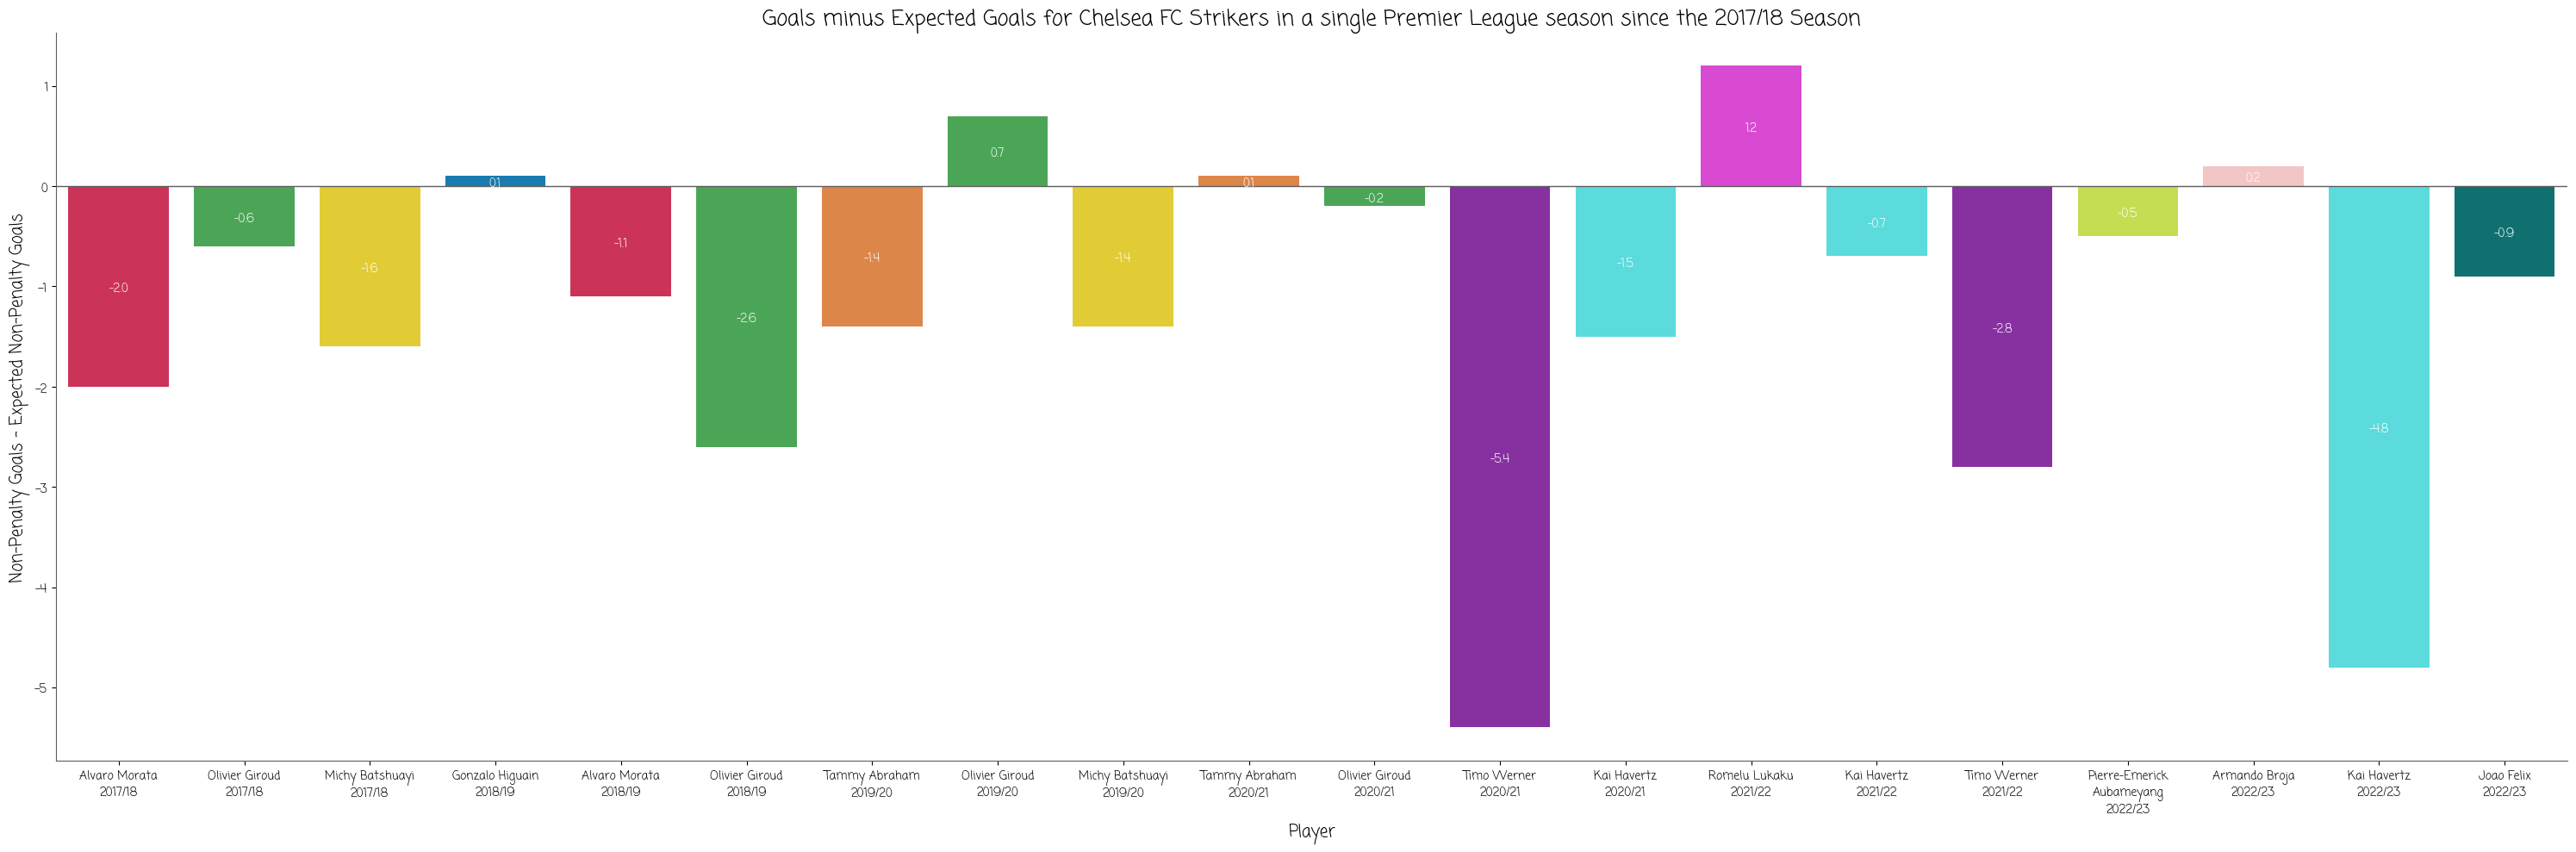

In [15]:
fig, ax = plt.subplots(figsize=(30, 10), tight_layout = True)

ax = sns.barplot(x = "ID", y="Non-Penalty Goals - Expected Non-Penalty Goals", data = shooting, palette = ColourPalette, label = "Non-Penalty Goals - Expected Non-Penalty Goals")

plt.title("Goals minus Expected Goals for Chelsea FC Strikers in a single Premier League season since the 2017/18 Season", size=18)
plt.xlabel("Player", size=14)
plt.ylabel("Non-Penalty Goals - Expected Non-Penalty Goals", size=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines[['bottom', 'left']].set_color('#5e5e5e')


for i in range(0, shooting.shape[0]):
    plt.text(x=i, y=((shooting['Non-Penalty Goals - Expected Non-Penalty Goals'][i]/2) - 0.05), s=np.round(shooting['Non-Penalty Goals - Expected Non-Penalty Goals'][i], 1), color='white', fontsize=10, weight='bold', horizontalalignment='center')


wrap_labels(ax,15)
plt.axhline(color='#5e5e5e', linewidth=1)

plt.show()

In [16]:
shooting['npxG per 90'] = np.round(shooting['Non-Penalty Expected Goals'] / shooting['90s'], 2)
shooting['Non-Penalty Goals'] = shooting['Goals'] - shooting['Penalty Kick Goals']
shooting['Non-Penalty Goals per 90'] = shooting['Non-Penalty Goals'] / shooting['90s']
shooting['Non-Penalty Goals per 90 - Expected Non-Penalty Goals per 90'] = np.round(shooting['Non-Penalty Goals per 90'] - shooting['npxG per 90'], 2)
shooting

,ID,First Name,Last Name,Nation,Season,Age,Matches Played,Starts,Minutes Played,90s,Goals,Shots,Shots on Target,Goals per 90,Shots on Target Percentage,Shots per 90,Shots on Target per 90,Goals per Shot,Goals per Shot on Target,Average Shot Distance,Penalty Kick Goals,Expected Goals,Non-Penalty Expected Goals,Non-Penalty Expected Goals per Shot,Goals - Expected Goals,Non-Penalty Goals - Expected Non-Penalty Goals,npxG per 90,Non-Penalty Goals,Non-Penalty Goals per 90,Non-Penalty Goals per 90 - Expected Non-Penalty Goals per 90
0,Alvaro Morata 2017/18,Alvaro,Morata,Spain,2017/18,24,31,24,"2,061",22.9,11,79,34,0.48,43.0%,3.45,1.48,0.14,0.32,13.6,0,13.0,13.0,0.16,-2.0,-2.0,0.57,11,0.480349,-0.09
1,Olivier Giroud 2017/18,Olivier,Giroud,France,2017/18,30,13,6,613,6.8,3,30,8,0.44,26.7%,4.40,1.17,0.10,0.38,11.5,0,3.6,3.6,0.12,-0.6,-0.6,0.53,3,0.441176,-0.09
2,Michy Batshuayi 2017/18,Michy,Batshuayi,Belgium,2017/18,23,12,3,360,4.0,2,13,5,0.50,38.5%,3.25,1.25,0.15,0.40,18.0,0,1.1,1.1,0.28,0.9,-1.6,0.28,2,0.500000,0.22
3,Gonzalo Higuain 2018/19,Gonzalo,Higuain,Argentina,2018/19,30,14,13,"1,085",12.1,5,46,14,0.41,30.4%,3.82,1.16,0.11,0.36,15.1,0,4.9,4.9,0.11,0.1,0.1,0.40,5,0.413223,0.01
4,Alvaro Morata 2018/19,Alvaro,Morata,Spain,2018/19,25,16,11,941,10.5,5,35,16,0.48,45.7%,3.35,1.53,0.14,0.31,13.7,0,6.1,6.1,0.17,-1.1,-1.1,0.58,5,0.476190,-0.10
5,Olivier Giroud 2018/19,Olivier,Giroud,France,2018/19,31,27,7,847,9.4,2,32,10,0.21,31.3%,3.40,1.06,0.06,0.20,11.4,0,4.6,4.6,0.14,-2.6,-2.6,0.49,2,0.212766,-0.28
6,Tammy Abraham 2019/20,Tammy,Abraham,England,2019/20,21,34,25,"2,215",24.6,15,88,35,0.61,39.8%,3.58,1.42,0.17,0.43,11.6,0,16.4,16.4,0.19,-1.4,-1.4,0.67,15,0.609756,-0.06
7,Olivier Giroud 2019/20,Olivier,Giroud,France,2019/20,32,18,12,993,11.0,8,39,19,0.73,48.7%,3.53,1.72,0.21,0.42,11.5,0,7.3,7.3,0.19,0.7,0.7,0.66,8,0.727273,0.07
8,Michy Batshuayi 2019/20,Michy,Batshuayi,Belgium,2019/20,25,16,1,239,2.7,1,15,2,0.37,13.3%,5.65,0.75,0.07,0.50,13.8,0,2.4,2.4,0.16,-1.4,-1.4,0.89,1,0.370370,-0.52
9,Tammy Abraham 2020/21,Tammy,Abraham,England,2020/21,22,22,12,"1,040",11.6,6,32,13,0.52,40.6%,2.77,1.13,0.19,0.46,10.7,0,5.9,5.9,0.18,0.1,0.1,0.51,6,0.517241,0.01


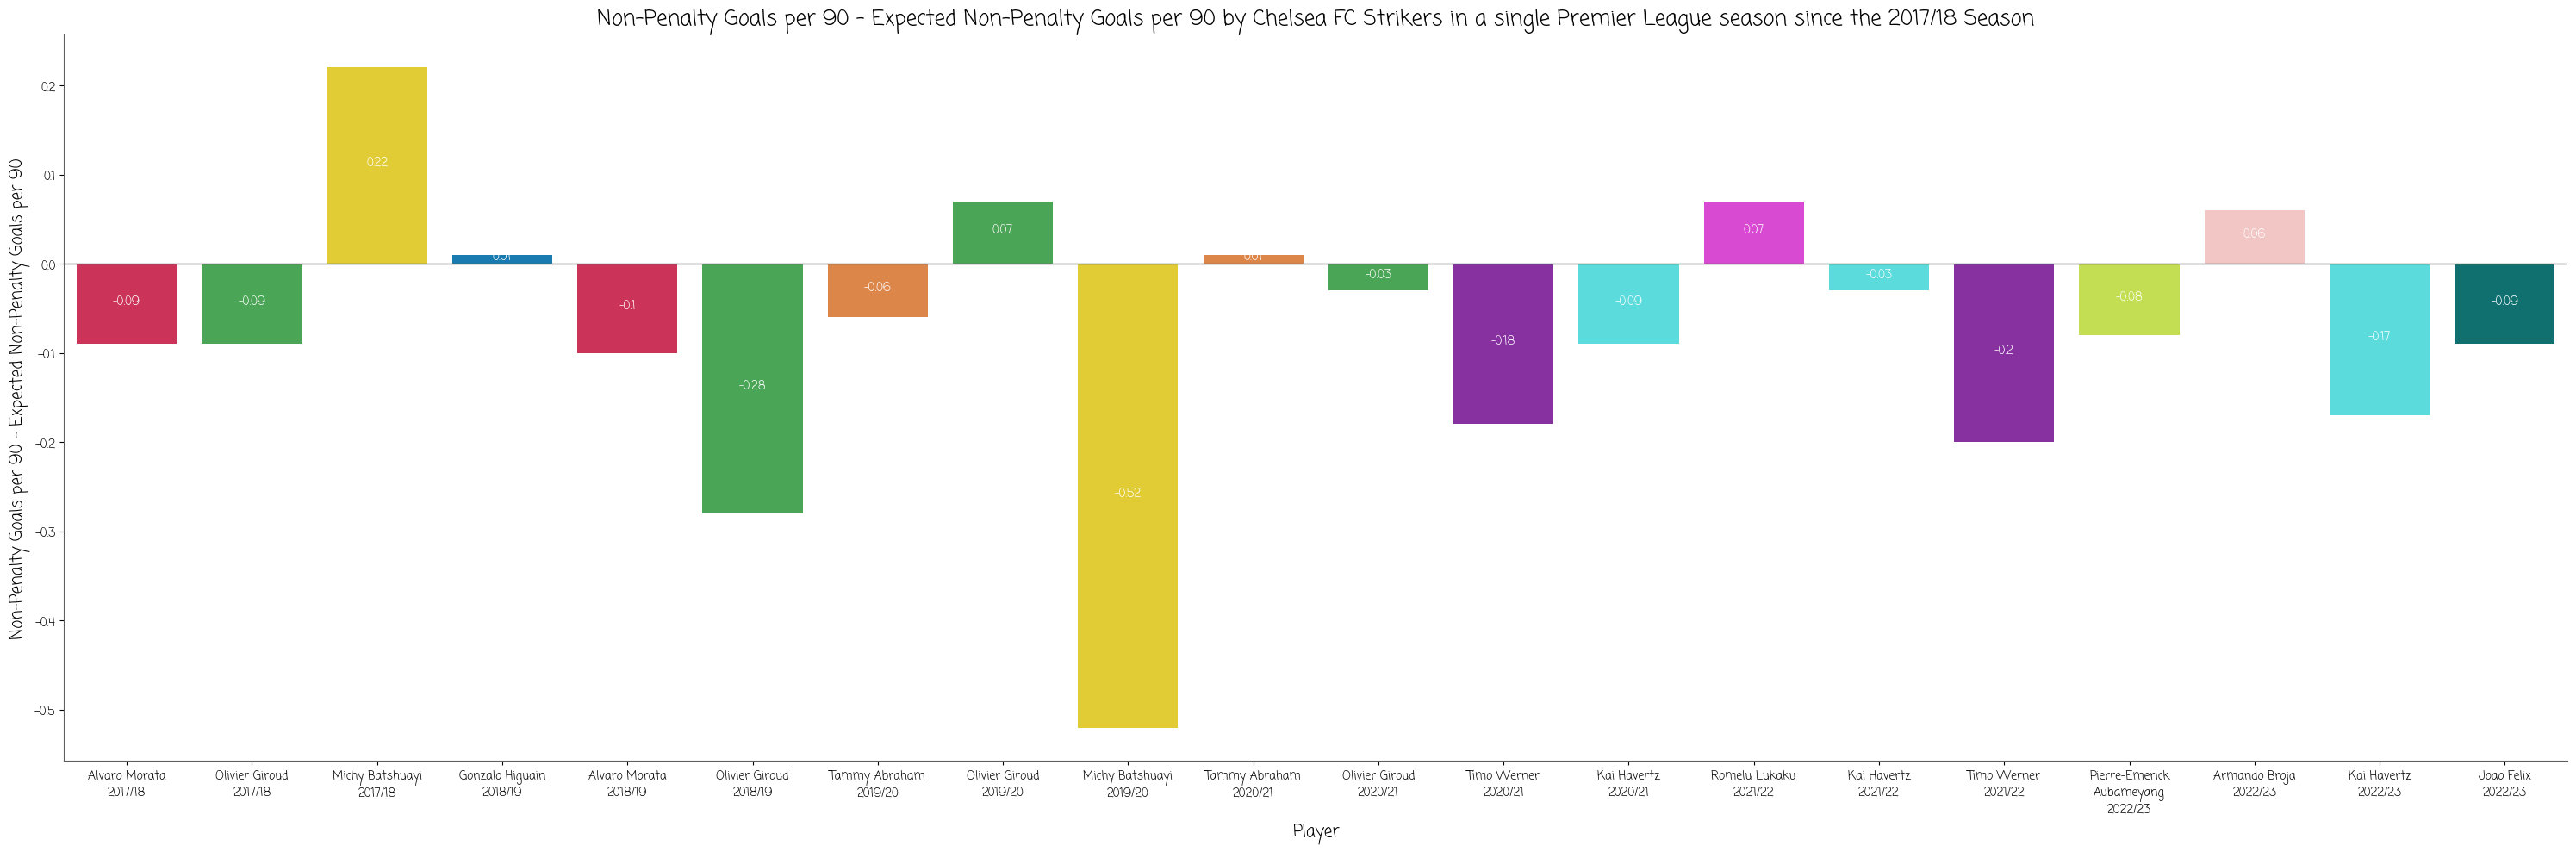

In [17]:
fig, ax = plt.subplots(figsize=(30, 10), tight_layout = True)

ax = sns.barplot(x = "ID", y="Non-Penalty Goals per 90 - Expected Non-Penalty Goals per 90", data = shooting, palette = ColourPalette, label = "Non-Penalty Goals per 90 - Expected Non-Penalty Goals per 90")

plt.title("Non-Penalty Goals per 90 - Expected Non-Penalty Goals per 90 by Chelsea FC Strikers in a single Premier League season since the 2017/18 Season", size=18)
plt.xlabel("Player", size=14)
plt.ylabel("Non-Penalty Goals per 90 - Expected Non-Penalty Goals per 90", size=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines[['bottom', 'left']].set_color('#5e5e5e')


for i in range(0, shooting.shape[0]):
    plt.text(x=i, y=((shooting['Non-Penalty Goals per 90 - Expected Non-Penalty Goals per 90'][i]/2)), s=np.round(shooting['Non-Penalty Goals per 90 - Expected Non-Penalty Goals per 90'][i], 2), color='white', fontsize=10, weight='bold', horizontalalignment='center')


wrap_labels(ax,15)
plt.axhline(color='#5e5e5e', linewidth=1)

plt.show()

In [18]:
npxG = pd.DataFrame()
npxG['Goals per 90'] = np.round(shooting['Non-Penalty Expected Goals'].copy() / shooting['90s'].copy(), 2)
npxG['Type'] = 'Non-Penalty Expected Goals'

npG = pd.DataFrame()
npG['Goals per 90'] = np.round((shooting['Goals'].copy() - shooting['Penalty Kick Goals'].copy()) / shooting['90s'].copy(), 2)
npG['Type'] = 'Non-Penalty Goals'

xGCompare = pd.concat([npG, npxG])
xGCompare['ID'] = shooting['ID'].copy()

xGCompare

,Goals per 90,Type,ID
0,0.48,Non-Penalty Goals,Alvaro Morata 2017/18
1,0.44,Non-Penalty Goals,Olivier Giroud 2017/18
2,0.50,Non-Penalty Goals,Michy Batshuayi 2017/18
3,0.41,Non-Penalty Goals,Gonzalo Higuain 2018/19
4,0.48,Non-Penalty Goals,Alvaro Morata 2018/19
5,0.21,Non-Penalty Goals,Olivier Giroud 2018/19
6,0.61,Non-Penalty Goals,Tammy Abraham 2019/20
7,0.73,Non-Penalty Goals,Olivier Giroud 2019/20
8,0.37,Non-Penalty Goals,Michy Batshuayi 2019/20
9,0.52,Non-Penalty Goals,Tammy Abraham 2020/21


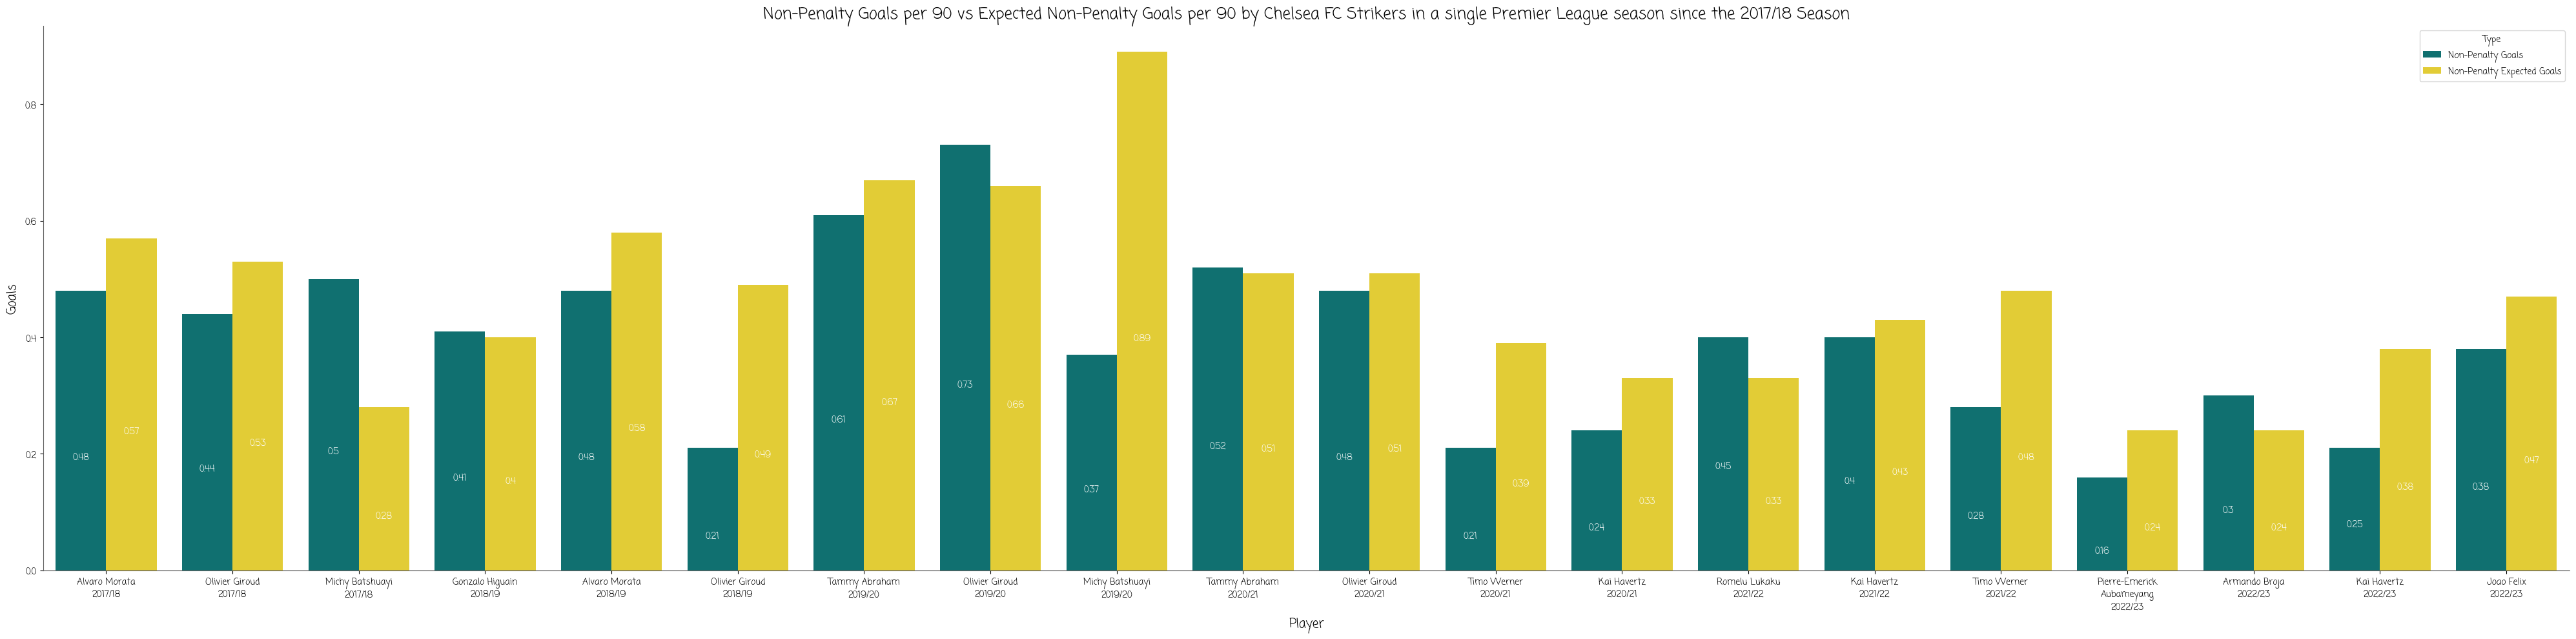

In [23]:
fig, ax = plt.subplots(figsize=(40, 10), tight_layout = True)

ColourPaletteDuo = [ColourPaletteUnique[10], ColourPaletteUnique[2], ColourPaletteUnique[6]]

ax = sns.barplot(x = "ID", y="Goals per 90", hue='Type', data = xGCompare, palette = ColourPaletteDuo, width=0.8)

plt.title("Non-Penalty Goals per 90 vs Expected Non-Penalty Goals per 90 by Chelsea FC Strikers in a single Premier League season since the 2017/18 Season", size=18)
plt.xlabel("Player", size=14)
plt.ylabel("Goals", size=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines[['bottom', 'left']].set_color('#5e5e5e')


for i in range(0, shooting.shape[0]):
    plt.text(x=i-0.2, y=((shooting['Goals per 90'][i]/2) - 0.05), s=np.round(shooting['Goals per 90'][i], 2), color='white', fontsize=10, weight='bold', horizontalalignment='center')
    plt.text(x=i+0.2, y=((shooting['npxG per 90'][i]/2) - 0.05), s=np.round(shooting['npxG per 90'][i], 2), color='white', fontsize=10, weight='bold', horizontalalignment='center')


wrap_labels(ax,15)
plt.axhline(color='#5e5e5e', linewidth=1)

plt.show()

## **Determining How Many Goals A Striker Will Score**

Red wine correlations


C:\Users\willi\AppData\Local\Temp\ipykernel_50732\2046748265.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(shooting.corr(method='pearson', min_periods=1)))
C:\Users\willi\AppData\Local\Temp\ipykernel_50732\2046748265.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationr = sns.heatmap(shooting.corr(method='pearson', min_periods=1), mask=mask, vmin=-1, vmax=1, annot=True, cmap=colour)


<Axes: title={'center': 'Triangle Correlation Heatmap to understand what stats correlate to scoring goals'}>

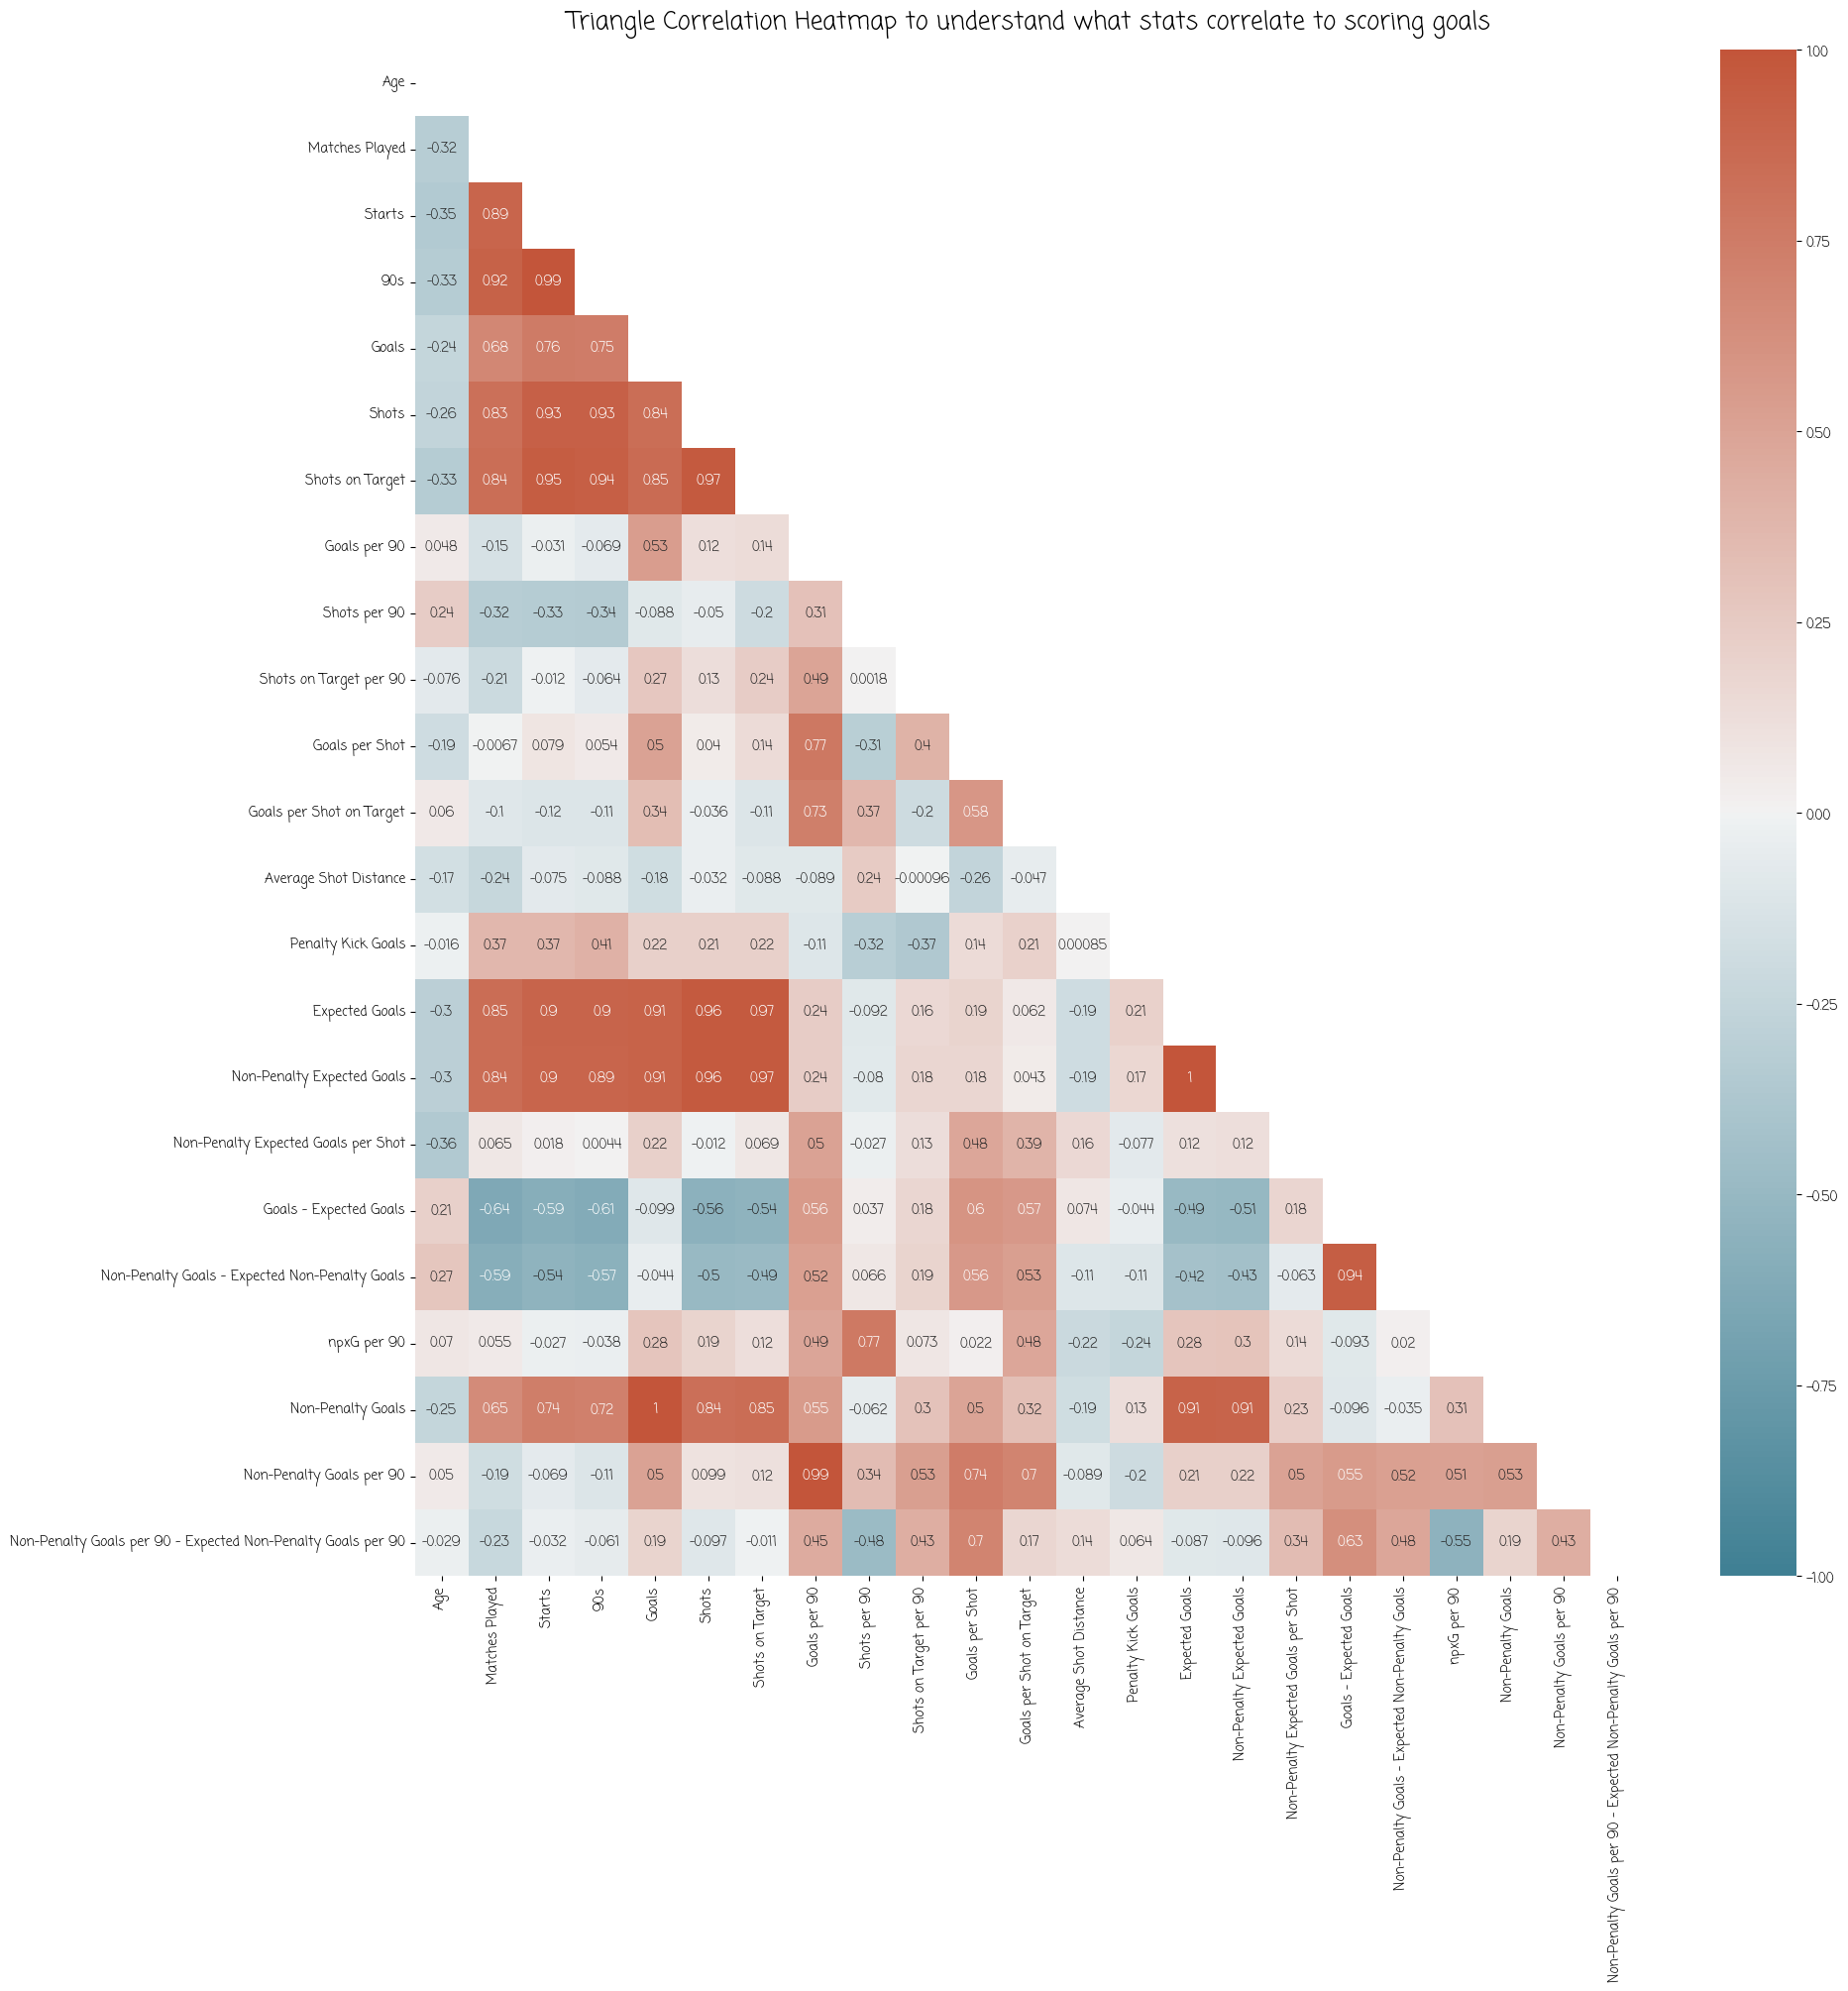

In [27]:
colour = sns.diverging_palette(220, 20, as_cmap=True)

print("Red wine correlations")
plt.figure(figsize=(20, 20))

# makes correlation heatmap triangular to remove duplicate values
mask = np.triu(np.ones_like(shooting.corr(method='pearson', min_periods=1)))

correlationr = sns.heatmap(shooting.corr(method='pearson', min_periods=1), mask=mask, vmin=-1, vmax=1, annot=True, cmap=colour)
correlationr.set_title('Triangle Correlation Heatmap to understand what stats correlate to scoring goals', fontdict={'fontsize':18}, pad=16);

display(correlationr)

C:\Users\willi\AppData\Local\Temp\ipykernel_50732\3516670412.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmapr = sns.heatmap(shooting.corr(method='pearson', min_periods=1)[['Goals per 90']].sort_values(by='Goals per 90', ascending=False), vmin=-1, vmax=1, annot=True, cmap=colour)


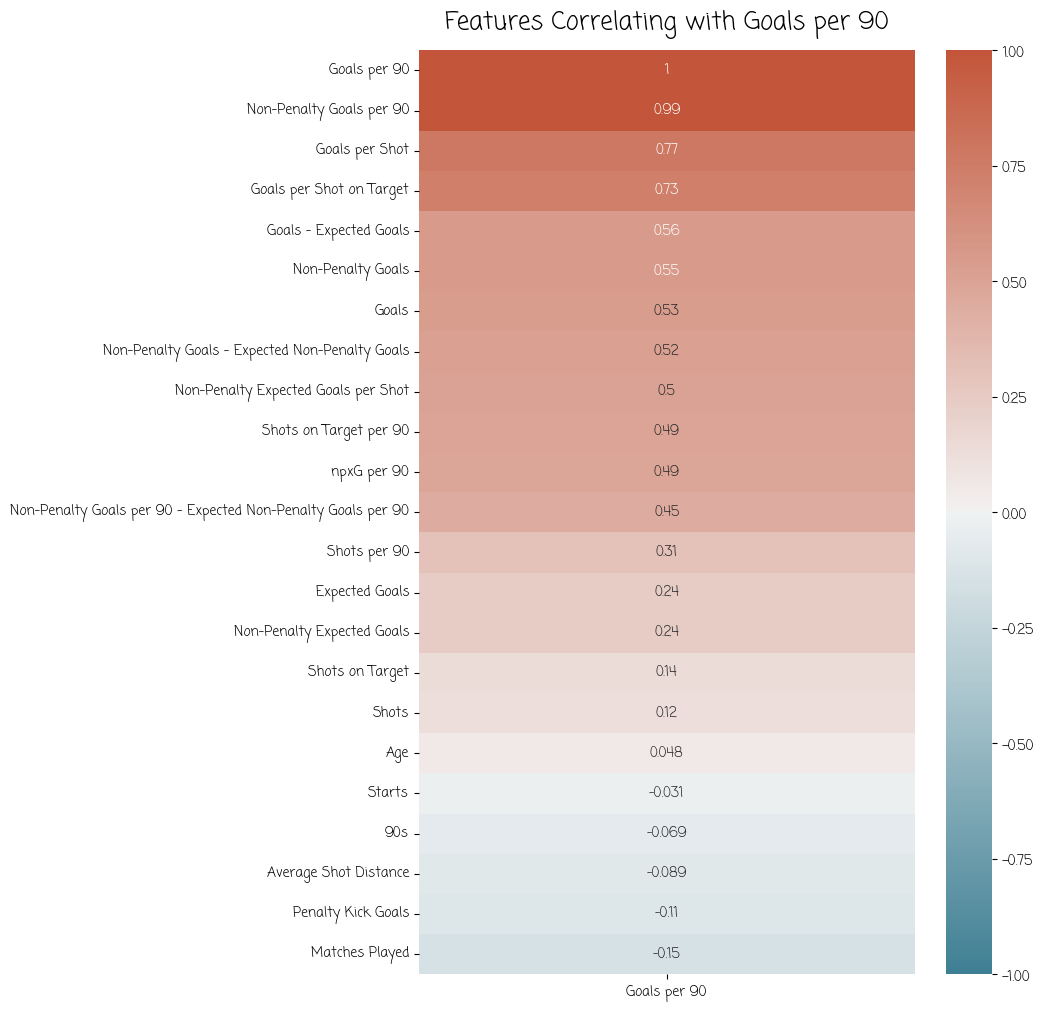

In [25]:
colour = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(8, 12))
heatmapr = sns.heatmap(shooting.corr(method='pearson', min_periods=1)[['Goals per 90']].sort_values(by='Goals per 90', ascending=False), vmin=-1, vmax=1, annot=True, cmap=colour)
heatmapr.set_title('Features Correlating with Goals per 90', fontdict={'fontsize':18}, pad=16);

C:\Users\willi\AppData\Local\Temp\ipykernel_50732\3319190889.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmapr = sns.heatmap(shooting.corr(method='pearson', min_periods=1)[['Goals per Shot on Target']].sort_values(by='Goals per Shot on Target', ascending=False), vmin=-1, vmax=1, annot=True, cmap=colour)


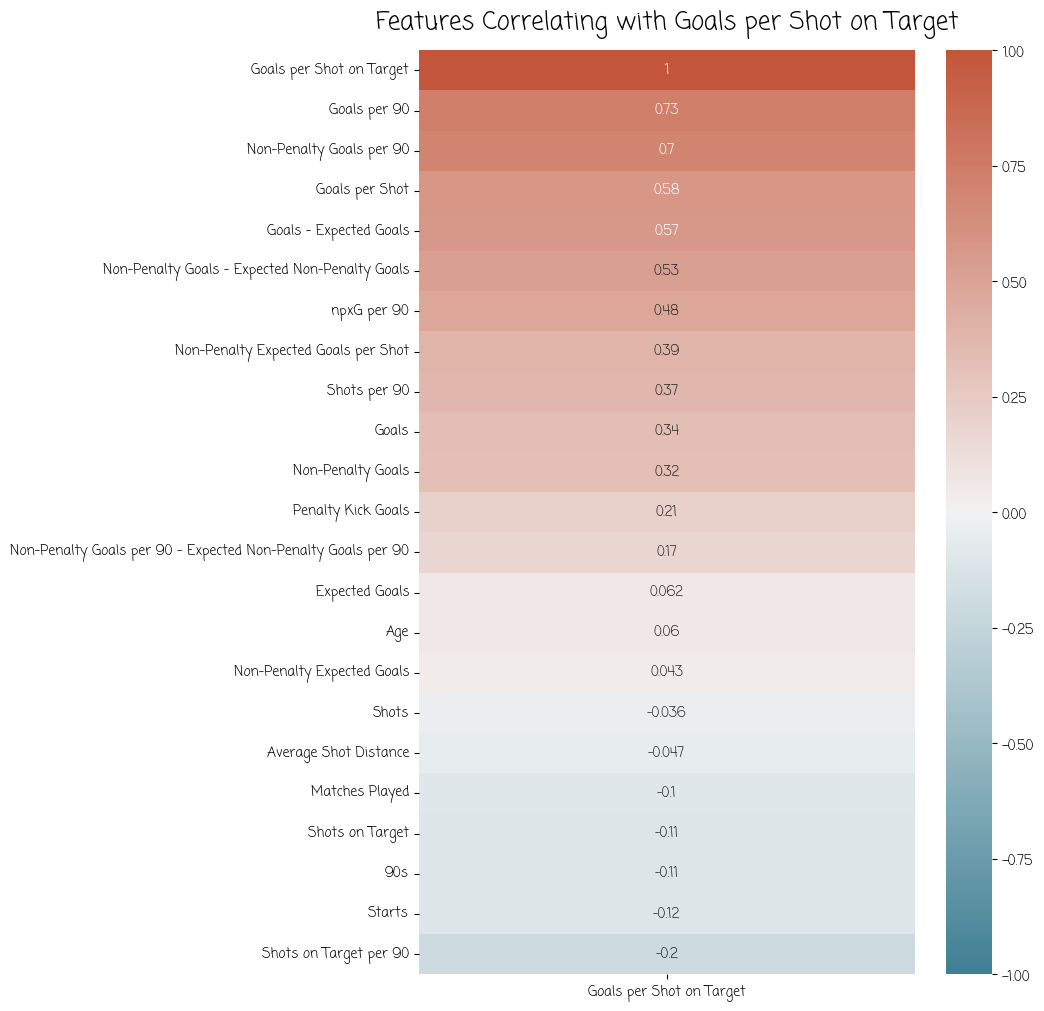

In [26]:
colour = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(8, 12))
heatmapr = sns.heatmap(shooting.corr(method='pearson', min_periods=1)[['Goals per Shot on Target']].sort_values(by='Goals per Shot on Target', ascending=False), vmin=-1, vmax=1, annot=True, cmap=colour)
heatmapr.set_title('Features Correlating with Goals per Shot on Target', fontdict={'fontsize':18}, pad=16);